In [56]:
pip install pmdarima

In [4]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv('C:/Users/33758/OneDrive - umontpellier.fr/Bureau/données_2020.csv', sep = ';',  encoding='latin-1')
df = df.dropna()
print('Shape of data',df.shape)
df.head(10)

Shape of data (17568, 40)


,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore
0,France,Données définitives,01/01/2020,00:00,67068.0,68000.0,65800.0,300.0,14.0,6515.0,...,6388.0,2452.0,244.0,517.0,343.0,325.0,ND,ND,ND,ND
2,France,Données définitives,01/01/2020,00:30,66103.0,66600.0,64800.0,107.0,13.0,6692.0,...,6379.0,3111.0,97.0,525.0,344.0,325.0,ND,ND,ND,ND
4,France,Données définitives,01/01/2020,01:00,63943.0,64900.0,63200.0,106.0,13.0,6257.0,...,6155.0,2654.0,324.0,524.0,338.0,325.0,ND,ND,ND,ND
6,France,Données définitives,01/01/2020,01:30,63904.0,65500.0,63800.0,107.0,14.0,5630.0,...,6088.0,2545.0,491.0,525.0,337.0,325.0,ND,ND,ND,ND
8,France,Données définitives,01/01/2020,02:00,63408.0,65400.0,63300.0,107.0,14.0,5337.0,...,6040.0,2522.0,138.0,530.0,344.0,325.0,ND,ND,ND,ND
10,France,Données définitives,01/01/2020,02:30,62711.0,64000.0,61600.0,107.0,15.0,4495.0,...,6012.0,2058.0,142.0,524.0,335.0,326.0,ND,ND,ND,ND
12,France,Données définitives,01/01/2020,03:00,60825.0,62000.0,59700.0,107.0,14.0,3660.0,...,5897.0,1643.0,118.0,530.0,331.0,325.0,ND,ND,ND,ND
14,France,Données définitives,01/01/2020,03:30,59332.0,60500.0,58300.0,107.0,14.0,2942.0,...,5754.0,1432.0,149.0,533.0,337.0,325.0,ND,ND,ND,ND
16,France,Données définitives,01/01/2020,04:00,58004.0,59100.0,57100.0,107.0,13.0,2942.0,...,5624.0,1397.0,0.0,538.0,339.0,325.0,ND,ND,ND,ND
18,France,Données définitives,01/01/2020,04:30,57125.0,58200.0,56200.0,107.0,14.0,2963.0,...,5508.0,1099.0,0.0,537.0,338.0,324.0,ND,ND,ND,ND


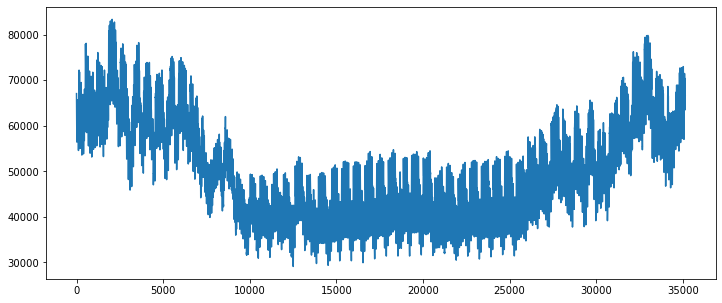

In [20]:
df['Consommation'].plot(figsize=(12,5)) #montre une évolution de la consommation

In [21]:
#Check for stationnarity

from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [24]:
adf_test(df['Consommation']) # not stationnary P-value so high 

1. ADF :  -1.2145140707414277
2. P-Value :  0.6673211699674714
3. Num Of Lags :  44
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 17523
5. Critical Values :
	 1% :  -3.430723238497956
	 5% :  -2.861704957013964
	 10% :  -2.5668578023342805


In [25]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [37]:
stepwise_fit = auto_arima(df['Consommation'], suppress_warnings=True)           
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                17568
Model:               SARIMAX(2, 1, 1)   Log Likelihood             -143610.951
Date:                Sun, 06 Nov 2022   AIC                         287231.902
Time:                        21:14:37   BIC                         287270.771
Sample:                             0   HQIC                        287244.699
                              - 17568                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0437      0.157      0.277      0.782      -0.265       0.352
ar.L1          1.6350      0.001   1202.775      0.000       1.632       1.638
ar.L2         -0.6858      0.001   -604.999      0.000      -0.688      -0.684
ma.L1         -0.9762      0.002   -491.856      0.000      -0.980      -0.972
sigma2      7.079e+05   6418.145    110.298      0.000    6.95e+05     7.2e+05
===================================================================================
Ljung-Box (L1) (Q):                  39.90   Jarque-Bera (JB):            504786.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -1.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
from statsmodels.tsa.arima_model import ARIMA

In [39]:
# Split Data into Training and Testing
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(17568, 40)
(17538, 40) (30, 40)
Périmètre                                            France
Nature                                  Données définitives
Date                                             31/12/2020
Heures                                                09:00
Consommation                                          66832
Prévision J-1                                         67700
Prévision J                                           66700
Fioul                                                    93
Charbon                                                   8
Gaz                                                    4248
Nucléaire                                             49437
Eolien                                                 4744
Solaire                                                  73
Hydraulique                                            6063
Pompage                                                -357
Bioénergies                                            1069
Ech. ph

In [ ]:
# Train the Model
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Consommation'],order=(1,0,5))
model=model.fit()
model.summary()

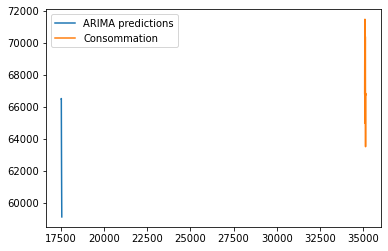

In [46]:
# Make Predictions on Test Set

start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['Consommation'].plot(legend=True)

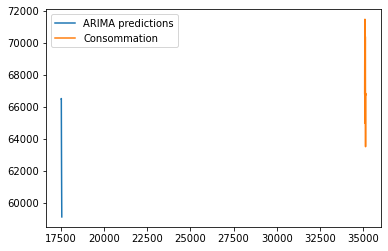

In [48]:
pred.plot(legend='ARIMA Predictions')
test['Consommation'].plot(legend=True)

In [ ]:
test['Consomamtion'].mean()

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Consommation']))
print(rmse)

5691.979154012346


In [ ]:
model2=ARIMA(df['Consommation'],order=(1,0,5))
model2=model2.fit()
df.tail()

In [ ]:
#For Future Dates
index_future_dates=pd.date_range(start='08-12-2022',end='09-12-2022')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

In [ ]:
pred.plot(figsize=(12,5),legend=True)